In [ ]:
# Kiana Mills
# Backpropagation - HW 6
# 11/16/19

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [85]:
#############################
##### HELPER FUNCTIONS ######
#############################

def randInitialWeights(rows, cols):
    weights = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            weights[i,j] = random.uniform(0,1) - 0.5
    return weights

def targetIs(A):
    target = np.array([0] * A.shape[0])
    for i in range(A.shape[0]):
        count = 0
        for j in range(A.shape[1]):
            if A[i,j] == 1:
                count += 1
        if count % 2 == 0: # even
            target[i] = 1
        else: # odd
            target[i] = 0
    return target

# The Sigmoid Function ( a smooth, monotonically increasing, differentiable function )
def sigmoid(A):
    return 1./(1+np.exp(-A))

def activation_fn(input_pattern, dim, pattern):
    output = np.zeros((dim, pattern))
    for i in range(dim):
        for j in range(dim):
            output[i,j] = sigmoid(input_pattern[i][j])
    return output
        
# Derivative of the sigmoid function
def f_prime(A):
    return (np.exp(-A) / np.square((1+np.exp(-A))))
    

In [86]:
lrate = 1
input_units = 8
hidden_units = 3
output_units = 1
num_patterns = 8

# 2. Set up the patterns that the network will be trained on ( A matrix of ones and zeros )
# The number of rows equal to the number of input units. 
# The number of columns = the number of patterns that the network will be trained on 
train = np.round(randInitialWeights(input_units, num_patterns) + 0.5)
patterns = []
for i in range(train.shape[0]):
    patterns.append(train[:,i])  

# 3. Determine the desired output for each pattern, 
# which is 1 if the number of ones in the input is even and zero if the number is odd. 
desired_output = targetIs(train)

# 4.  Create two matrices for the weights that connect the input to hidden units (w_fg), 
# and hidden units to the output unit (w_gh).  
# Fill these matrices with uniform random numbers between –0.5 and 0.5.  
w_fg = randInitialWeights(hidden_units, input_units)
w_gh = randInitialWeights(output_units, hidden_units)
# print(w_fg.shape) # 3x8
# print(w_gh.shape) # 1x3

num_epochs = 1000
epoch = 1
SSE = 0
SSE_vec = []
reset = 0 # number of times had to reset because failed to converge

while epoch <= num_epochs:
    # For each input pattern 
    for p in range(num_patterns):   
        pattern = train[:,p]
        # a-e
        input_to_hidden = w_fg.dot(pattern)          # pass the activation from the input units to the hidden units
        input_to_hidden.reshape((1,3))
        hidden_activation = sigmoid(input_to_hidden )   # determine hidden unit activation
        input_to_output = np.dot(w_gh, hidden_activation) # pass activation from hidden to output
        output_activation = sigmoid(input_to_output)   # determine output activation
        error = desired_output - output_activation

        t = desired_output[p]
        h = output_activation
        g = hidden_activation
        Wgh_g = input_to_output
        Wfg_f = input_to_hidden 
    
        # Determine and Apply the weight changes (dw)
        dw_fg = lrate * np.dot(np.diag(f_prime(Wfg_f)),w_gh.T) * (t-h) * f_prime(Wgh_g) * pattern
        w_fg = w_fg + dw_fg
        
        g = g.reshape(1,3)
        dw_gh = lrate * np.dot(np.diag(f_prime(Wgh_g))*(t-h), g)
        w_gh = w_gh + dw_gh
        

    epoch += 1
    # Compute SSE over all patterns
    # first compute a-e again with the new w_fg and w_gh
    input_to_hidden = w_fg.dot(train)             # pass the activation from the input units to the hidden units
    hidden_activation = activation_fn(input_to_hidden, 3, 8)   # determine hidden unit activation
    input_to_output = np.dot(w_gh, hidden_activation) # pass activation from hidden to output
    output_activation = activation_fn(input_to_output, 1, 8)   # determine output activation
    output_error = desired_output - output_activation
    
    SSE = np.trace(np.dot(output_error.T,output_error))-3
    SSE_vec.append(SSE)
    
    if epoch % 10 == 0:
        print("Epoch: ", epoch)
        print("SSE: ", SSE)
    
    if SSE <= 0.01:
        break
        
#     if epoch == num_epochs:
#         if SSE > 0.01:
#             print("ERROR: did not converge; Re-running with new set of random weights.")
#             train = randInitialWeights(input_units, num_patterns)
#             desired_output = targetIs(train)
#             epoch = 1 # reset the loop
#             SSE_vec = []
#             reset += 1
    
#     if reset > 3:
#         print("Too many resets")
#         break



Epoch:  10
SSE:  1.112670704792392
Epoch:  20
SSE:  1.0360357989424944
Epoch:  30
SSE:  1.0181133605363701
Epoch:  40
SSE:  1.0113630712186144
Epoch:  50
SSE:  1.0080539346559618
Epoch:  60
SSE:  1.006147927659745
Epoch:  70
SSE:  1.0049285834846788
Epoch:  80
SSE:  1.0040896829028512
Epoch:  90
SSE:  1.0034811138631063
Epoch:  100
SSE:  1.0030215311703712
Epoch:  110
SSE:  1.0026633693069975
Epoch:  120
SSE:  1.0023771074934489
Epoch:  130
SSE:  1.0021435260212481
Epoch:  140
SSE:  1.0019496108653438
Epoch:  150
SSE:  1.00178625656355
Epoch:  160
SSE:  1.0016469131470753
Epoch:  170
SSE:  1.0015267555137228
Epoch:  180
SSE:  1.001422155160137
Epoch:  190
SSE:  1.001330333765706
Epoch:  200
SSE:  1.0012491298675439
Epoch:  210
SSE:  1.0011768379571002
Epoch:  220
SSE:  1.0011120951717327
Epoch:  230
SSE:  1.0010537999953009
Epoch:  240
SSE:  1.001001052935429
Epoch:  250
SSE:  1.0009531125731987
Epoch:  260
SSE:  1.0009093625486765
Epoch:  270
SSE:  1.0008692864465356
Epoch:  280
SSE: 

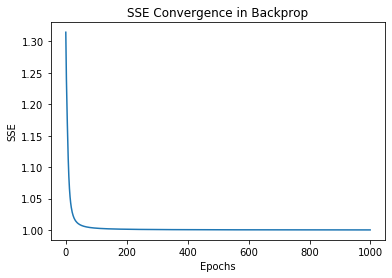

In [91]:
plt.plot(SSE_vec)
plt.title("SSE Convergence in Backprop")
plt.ylabel("SSE")
plt.xlabel("Epochs")
plt.show()